# matplotlibによるデータの可視化の基礎の基礎

の前に,Jupyter ipynbのショートカット.

参考：https://qiita.com/zawawahoge/items/baa2a5318df079c5f7e5#mac-os

最低限,
- コードセルにする：Y
- マークダウンセルにする：M
- セルの実行：shift + Enter
- 選択しているセルの削除：D → D
- 削除したセルを巻き戻す：Z

位は覚える.

## 1. 棒グラフの作成
**離散的**な項目が持つ量の違いを可視化する際には,`plt.bar`で使って棒グラフを描く.

### 1.1. 単純な棒グラフの作成
例：オフィス内の職種ごとの人数を図示

In [4]:
# 必要ライブラリの読み込み
from matplotlib import pyplot as plt
import numpy as np

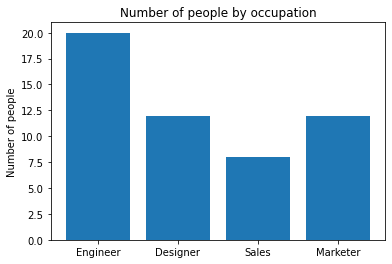

In [5]:
occupations = np.array(["Engineer", "Designer", "Sales", "Marketer"])
number_of_people = np.array([20, 12, 8, 12])

# x軸に[0, 1, 2, 3]、y軸に高さ[number_of_people]の棒グラフをプロット
plt.bar(range(len(occupations)), number_of_people)

plt.title("Number of people by occupation") # グラフのタイトル
plt.ylabel("Number of people") # Y軸にラベルを追加.
# 棒の中心に合わせて職種名をx軸のラベルにする
plt.xticks(range(len(occupations)),occupations)

# グラフを図示
plt.show()

## 1.2. ヒストグラム
離散的なデータの,集まりごとの分布を視覚的に表現する方法としては,ヒストグラムが有効.

例：あるテストを実施した際の成績分布の図示

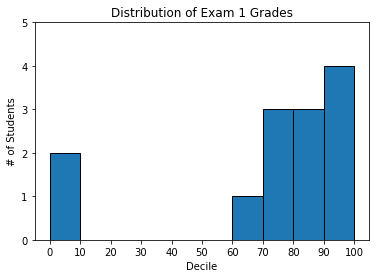

In [17]:
# 以下例はplt.barを使って頑張ったが, plt.hist()を使った方が楽らしい.

from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 92, 100, 67, 74, 77, 0]
# 点数を十分位数でグループ化. ただし100点は90点台に含める.
histgram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histgram.keys()], # グラフの棒を右に5ずらす
        histgram.values(), # 値に合わせた高さに設定
        10, # 棒の幅を10に設定
        edgecolor=(0, 0, 0)) # 棒の枠線を黒にする
plt.axis([-5, 105, 0, 5]) # X軸の範囲を-5 ~ 105, Y軸の範囲を0 ~ 5にする

plt.xticks([10 * i for i in range(11)]) # X軸のラベルを10ずつ並べる
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

### 1.2.1. 軸は適切に
plt.axisは慎重に. Y軸の範囲を0から始めていない形式のグラフは誤った印象を与える.

例：「地球温暖化」という単語を聞いた回数

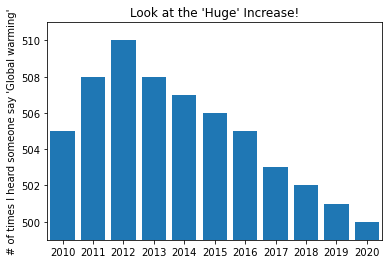

In [8]:
mentions = [505, 508, 510, 508, 507, 506, 505, 503, 502, 501, 500]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'Global warming'")

# 誤った印象を与えるグラフ
plt.axis([2009.5, 2020.5, 499, 511])
plt.title("Look at the 'Huge' Increase!")
plt.show()

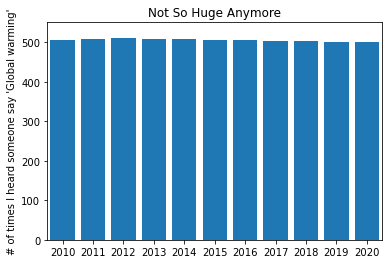

In [9]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'Global warming'")

# Y軸は0から始める
plt.axis([2009.5, 2020.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

### 1.3. 折れ線グラフ
連続値でデータの**推移**を視覚的に図示する場合は,`plt.plot`を使って折れ線グラフを描く.


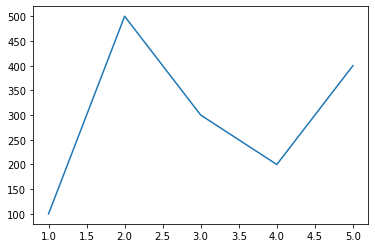

In [22]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([100, 500, 300, 200, 400])

plt.plot(x, y)
plt.show()

### 1.3.1 滑らかなグラフ
横軸を適当な間隔にすることで, sin波などの滑らかなグラフも描ける.

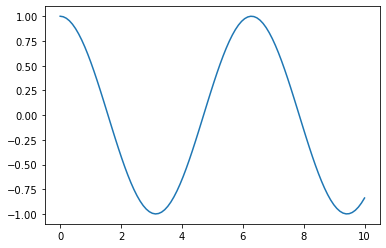

In [21]:
x = np.linspace(0, 10, 100)
y = np.cos(x) # y = sin(x)

plt.plot(x, y)
plt.show()

## 1.4. 散布図
データの相関関係等を可視化する際は`plt.scatter`で散布図を描く.

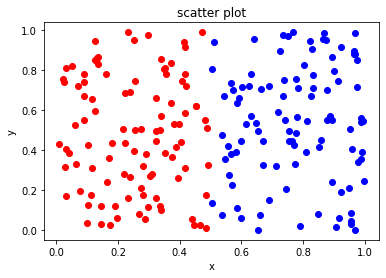

In [16]:
# generate data
x1 = np.random.rand(100)*0.5
y1 = np.random.rand(100)

x2 = np.random.rand(100)*0.5 + 0.5
y2 = np.random.rand(100)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

# 散布図の生成
ax.scatter(x1,y1, c='red')
ax.scatter(x2,y2, c='blue')

ax.set_title('scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()


## 参考文献
- https://qiita.com/nkay/items/d1eb91e33b9d6469ef51

- Joel Grus(2017). Data Science from Scratch -*First Principles with Python*